## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [3]:
# your code here 

%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary cache directory at /var/folders/hh/9p38b7xx6b50mvzqx94q5p_80000gn/T/matplotlib-acwwsfcn because the default path (/Users/nilshollestelle/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298 entries, 6348 to 32843
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    298 non-null    object  
 1   lsoa11nm    298 non-null    object  
 2   lsoa11nmw   298 non-null    object  
 3   st_areasha  298 non-null    float64 
 4   st_lengths  298 non-null    float64 
 5   IMD_Rank    298 non-null    int64   
 6   IMD_Decile  298 non-null    int64   
 7   LSOA01NM    298 non-null    object  
 8   LADcd       298 non-null    object  
 9   LADnm       298 non-null    object  
 10  IMDScore    298 non-null    float64 
 11  IMDRank0    298 non-null    int64   
 12  IMDDec0     298 non-null    int64   
 13  IncScore    298 non-null    float64 
 14  IncRank     298 non-null    int64   
 15  IncDec      298 non-null    int64   
 16  EmpScore    298 non-null    float64 
 17  EmpRank     298 non-null    int64   
 18  EmpDec      298 non-null    int64   
 19  

<Axes: >

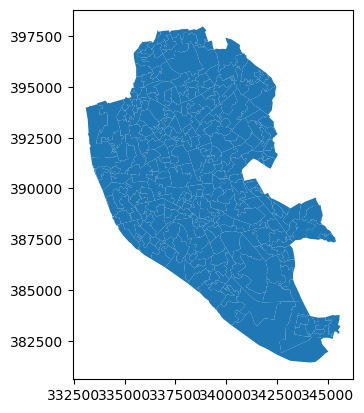

In [31]:
# your code here (Edwin - Question 1)

# reading the file in
imd_shp = 'data/IMD/lab04_imd.shp'
lookup_path = 'data/IMD/OAs/'

imd = gpd.read_file(imd_shp)

imd = imd.loc[imd['LADnm']=='Liverpool', :]
#imd = imd.set_index('lsoa11cd')

# display of overview, showing evidence of polygons
imd.info()
imd.plot()

In [32]:
imd.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rank,IMD_Decile,LSOA01NM,LADcd,LADnm,...,IndDec,OutScore,OutRank,OutDec,TotPop,DepChi,Pop16_59,Pop60+,WorkPop,geometry
6348,E01006512,Liverpool 031A,Liverpool 031A,283906.863775,3063.168774,14664,5,Liverpool 031A,E08000012,Liverpool,...,1,0.536,8031,3,2975,255,2639,81,2649.50,"POLYGON ((335888.000 390042.000, 336203.000 39..."
6349,E01006513,Liverpool 060A,Liverpool 060A,555037.185423,5835.725743,11173,4,Liverpool 060A,E08000012,Liverpool,...,1,0.974,4329,2,4418,103,4222,93,4257.75,"POLYGON ((335374.808 390547.998, 335405.406 39..."
6350,E01006514,Liverpool 037A,Liverpool 037A,262030.747956,3243.503128,3299,2,Liverpool 037A,E08000012,Liverpool,...,1,0.550,7888,3,1760,87,1439,234,1538.25,"POLYGON ((335650.536 389928.121, 335677.916 38..."
6351,E01006515,Liverpool 037B,Liverpool 037B,366499.754871,4273.694263,1875,1,Liverpool 037B,E08000012,Liverpool,...,3,0.615,7285,3,1438,176,1013,249,1014.75,"POLYGON ((335178.000 389642.000, 335222.397 38..."
6352,E01006518,Liverpool 044A,Liverpool 044A,235181.260598,2743.746370,330,1,Liverpool 044A,E08000012,Liverpool,...,2,0.564,7747,3,1732,287,971,474,993.00,"POLYGON ((335528.316 389067.946, 335612.896 38..."


In [35]:
def create_contiguity_weights(dataset, index_col):
    w_queen = weights.Queen.from_dataframe(dataset, ids=index_col)
    return w_queen

w_1 = create_contiguity_weights(imd,'lsoa11cd')
w_1['E01006513']
#w_1.plot(imd)

{'E01006747': 1.0,
 'E01033757': 1.0,
 'E01006512': 1.0,
 'E01006514': 1.0,
 'E01033760': 1.0,
 'E01033761': 1.0,
 'E01033756': 1.0,
 'E01006751': 1.0,
 'E01006515': 1.0}

In [ ]:
# your code here (Heqnes - Question 2)



In [11]:
# your code here (Mannan - Question 3)


In [40]:


imd = gpd.read_file(imd_shp)
imd = imd.set_index("lsoa11cd")

In [42]:
# your code here (Nils - Question 4)

def create_distance_weights(coordinates, treshold): #define function with variables coordinates for data set and treshold distamce.
    
    w_dist_based = weights.DistanceBand.from_dataframe(coordinates, treshold) #binary = False creates 

    return w_dist_based

test_matrix = create_distance_weights(imd, 10000)    #test return matrix
test_matrix['E01000333']                            #check for specific coordinate

/Users/nilshollestelle/miniconda3/lib/python3.12/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 8 islands with ids: E01019077, E01019229, E01019305, E01019325, E01027447, E01027479, E01027503, E01027585.
  w = W(neighbors, weights, ids, **kwargs)
/Users/nilshollestelle/miniconda3/lib/python3.12/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 8 islands with ids: E01019077, E01019229, E01019305, E01019325, E01027447, E01027479, E01027503, E01027585.
  W.__init__(


{'E01000006': 1.0,
 'E01000007': 1.0,
 'E01000008': 1.0,
 'E01000009': 1.0,
 'E01000010': 1.0,
 'E01000011': 1.0,
 'E01000012': 1.0,
 'E01000013': 1.0,
 'E01000014': 1.0,
 'E01000015': 1.0,
 'E01000016': 1.0,
 'E01000017': 1.0,
 'E01000018': 1.0,
 'E01000019': 1.0,
 'E01000020': 1.0,
 'E01000021': 1.0,
 'E01000022': 1.0,
 'E01000023': 1.0,
 'E01000024': 1.0,
 'E01000025': 1.0,
 'E01000033': 1.0,
 'E01000034': 1.0,
 'E01000035': 1.0,
 'E01000036': 1.0,
 'E01000037': 1.0,
 'E01000038': 1.0,
 'E01000039': 1.0,
 'E01000040': 1.0,
 'E01000041': 1.0,
 'E01000042': 1.0,
 'E01000043': 1.0,
 'E01000044': 1.0,
 'E01000045': 1.0,
 'E01000046': 1.0,
 'E01000048': 1.0,
 'E01000049': 1.0,
 'E01000050': 1.0,
 'E01000051': 1.0,
 'E01000052': 1.0,
 'E01000053': 1.0,
 'E01000054': 1.0,
 'E01000055': 1.0,
 'E01000056': 1.0,
 'E01000057': 1.0,
 'E01000058': 1.0,
 'E01000059': 1.0,
 'E01000060': 1.0,
 'E01000061': 1.0,
 'E01000062': 1.0,
 'E01000063': 1.0,
 'E01000064': 1.0,
 'E01000065': 1.0,
 'E01000066'

In [24]:
def create_distance_weights_2(coordinates, treshold, index): #define function with variables coordinates for data set and treshold distamce.
    
    w_dist_based = weights.DistanceBand.from_shapefile(coordinates, treshold, idVariable=index) #binary = False creates 

    return w_dist_based

test_matrix = create_distance_weights_2(imd_shp, 1000, 'lsoa11cd')    #test return matrix
test_matrix['E01000333']                            #check for specific coordinate

{'E01000332': 1.0,
 'E01000334': 1.0,
 'E01000336': 1.0,
 'E01000337': 1.0,
 'E01000338': 1.0,
 'E01000402': 1.0,
 'E01000420': 1.0,
 'E01000437': 1.0,
 'E01000442': 1.0}

In [26]:
def create_distance_weights_3(coordinate, treshold):
    
    w_dist_based = weights.DistanceBand.from_dataframe(imd, treshold, binary=False)
    w_point = w_dist_based[coordinate]

    return w_point

create_distance_weights_3('E01000333', 1000)

# test_matrix = create_distance_weights(imd, 1000)
# test_matrix['E01000333']

/Users/nilshollestelle/miniconda3/lib/python3.12/site-packages/scipy/sparse/_data.py:133: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/nilshollestelle/miniconda3/lib/python3.12/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 7664 disconnected components.
 There are 6490 islands with ids: E01000090, E01000188, E01000228, E01000253, E01000255, E01000279, E01000290, E01000383, E01000430, E01000656, E01000658, E01000666, E01000680, E01000720, E01000728, E01000747, E01000748, E01000749, E01000751, E01001064, E01001121, E01001412, E01001417, E01001422, E01002114, E01002144, E01002259, E01002276, E01002296, E01002304, E01002305, E01002385, E01002391, E01002438, E01002439, E01002440, E01002441, E01002444, E01002461, E01002473, E01002499, E01002678, E01002948, E01003640, E01003726, E01003806, E01003816, E01004076, E01004108, E01004768, E01004775, E01004776, E01004783, E01004789

{'E01000332': 0.0018920562093006168,
 'E01000334': 0.002031851356274616,
 'E01000336': 0.0010652182458025631,
 'E01000337': 0.0013785110807527227,
 'E01000338': 0.0016882357772959977,
 'E01000402': 0.0015082318642596435,
 'E01000420': 0.0014475061593661749,
 'E01000437': 0.0012831792967482824,
 'E01000442': 0.002118051857366396}

In [ ]:
# your code here (Renee - Question 5)
